#Weather Prediction System Using LSTM

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load CSV
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/ML Workshop/SriLanka_Weather_Dataset_V1.csv"
df = pd.read_csv(file_path)

print("Columns and Data Types:")
print(df.dtypes)

# Show first few rows
print("\nSample Data:")
print(df.head())

Mounted at /content/drive
Columns and Data Types:
time                           object
weathercode                     int64
temperature_2m_max            float64
temperature_2m_min            float64
temperature_2m_mean           float64
apparent_temperature_max      float64
apparent_temperature_min      float64
apparent_temperature_mean     float64
sunrise                        object
sunset                         object
shortwave_radiation_sum       float64
precipitation_sum             float64
rain_sum                      float64
snowfall_sum                    int64
precipitation_hours             int64
windspeed_10m_max             float64
windgusts_10m_max             float64
winddirection_10m_dominant      int64
et0_fao_evapotranspiration    float64
latitude                      float64
longitude                     float64
elevation                       int64
country                        object
city                           object
dtype: object

Sample Data:
       tim

##2: Data Loading and Initial Exploration


In [ ]:
# Load the dataset

# Once uploaded, load it into a DataFrame
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Dataset statistics
print("\nDataset statistics:")
df.describe()

Dataset shape: (147480, 24)

First few rows:

Missing values per column:
time                          0
weathercode                   0
temperature_2m_max            0
temperature_2m_min            0
temperature_2m_mean           0
apparent_temperature_max      0
apparent_temperature_min      0
apparent_temperature_mean     0
sunrise                       0
sunset                        0
shortwave_radiation_sum       0
precipitation_sum             0
rain_sum                      0
snowfall_sum                  0
precipitation_hours           0
windspeed_10m_max             0
windgusts_10m_max             0
winddirection_10m_dominant    0
et0_fao_evapotranspiration    0
latitude                      0
longitude                     0
elevation                     0
country                       0
city                          0
dtype: int64

Dataset statistics:


,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation
count,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.0,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000,147480.000000
mean,46.647776,29.242367,23.899913,26.225590,34.112355,27.711096,30.317066,18.483513,5.975637,5.975637,0.0,8.762524,15.561288,34.796932,182.881625,3.896143,7.123334,80.263335,111.733333
std,21.623876,2.120345,2.059291,1.842147,2.966144,2.835051,2.540275,4.214270,10.215294,10.215294,0.0,7.191010,6.213737,10.214372,93.670247,1.023126,0.798620,0.488871,266.380824
min,0.000000,17.500000,12.100000,16.300000,18.500000,10.500000,16.300000,1.230000,0.000000,0.000000,0.0,0.000000,2.200000,11.500000,0.000000,0.420000,6.000000,79.800020,0.000000
25%,51.000000,28.200000,23.100000,25.600000,32.400000,26.400000,29.200000,16.220000,0.400000,0.400000,0.0,2.000000,11.000000,26.600000,88.000000,3.260000,6.800003,79.899994,7.000000
50%,53.000000,29.200000,24.300000,26.400000,34.200000,28.400000,30.800000,19.130000,2.600000,2.600000,0.0,8.000000,15.000000,33.100000,215.000000,3.890000,6.900002,80.000000,14.000000
75%,61.000000,30.400000,25.200000,27.200000,36.100000,29.600000,31.900000,21.510000,7.500000,7.500000,0.0,14.000000,18.900000,41.800000,249.000000,4.550000,7.400002,80.399994,27.000000
max,65.000000,37.500000,30.000000,31.800000,43.400000,34.700000,37.400000,28.980000,338.800000,338.800000,0.0,24.000000,50.200000,91.800000,360.000000,8.140000,9.700005,81.800020,1281.000000


##3: Data Preprocessing

In [ ]:
# Initial data exploration before preprocessing
print("Dataset shape before preprocessing:", df.shape)
print("Data types:")
print(df.dtypes)

Dataset shape before preprocessing: (147480, 24)
Data types:
time                           object
weathercode                     int64
temperature_2m_max            float64
temperature_2m_min            float64
temperature_2m_mean           float64
apparent_temperature_max      float64
apparent_temperature_min      float64
apparent_temperature_mean     float64
sunrise                        object
sunset                         object
shortwave_radiation_sum       float64
precipitation_sum             float64
rain_sum                      float64
snowfall_sum                    int64
precipitation_hours             int64
windspeed_10m_max             float64
windgusts_10m_max             float64
winddirection_10m_dominant      int64
et0_fao_evapotranspiration    float64
latitude                      float64
longitude                     float64
elevation                       int64
country                        object
city                           object
dtype: object


In [ ]:
# Check for duplicated records
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate records: {duplicates}")
if duplicates > 0:
    print("Removing duplicate records...")
    df = df.drop_duplicates()
    print(f"Dataset shape after removing duplicates: {df.shape}")



Number of duplicate records: 0


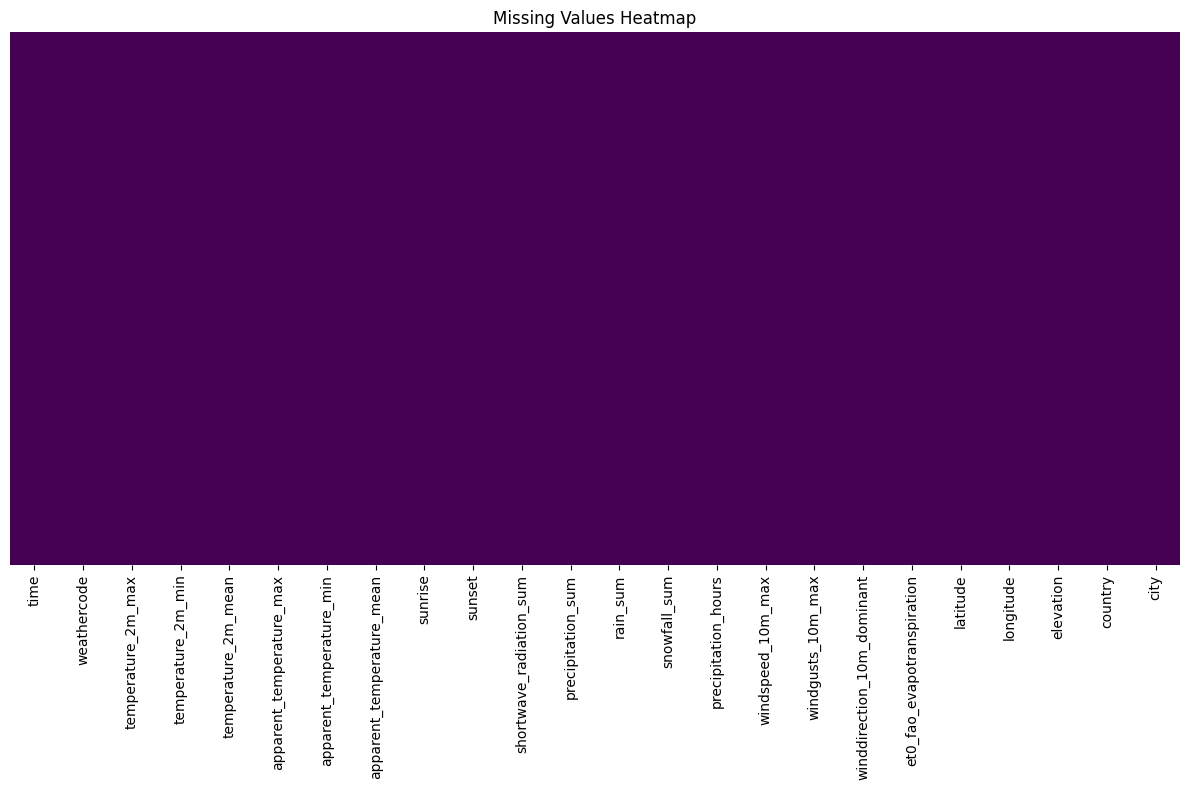

In [ ]:
# Visualize missing values with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print("\nPercentage of missing values in each column:")
missing_cols = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
print(missing_cols)


Percentage of missing values in each column:
Series([], dtype: float64)


In [ ]:
# For columns with high missing values (>50%), consider dropping them
high_missing_cols = missing_percentage[missing_percentage > 50].index.tolist()
if high_missing_cols:
    print(f"\nColumns with >50% missing values: {high_missing_cols}")
    print("Consider whether these columns should be dropped.")

# Convert date/time columns to datetime format
if 'time' in df.columns:
    print("\nConverting 'time' column to datetime and setting as index...")
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)


Converting 'time' column to datetime and setting as index...



Processing sunrise and sunset columns...
Created new feature: 'daylight_hours' (range: 11.55 to 12.70 hours)

Checking for outliers in numerical columns:


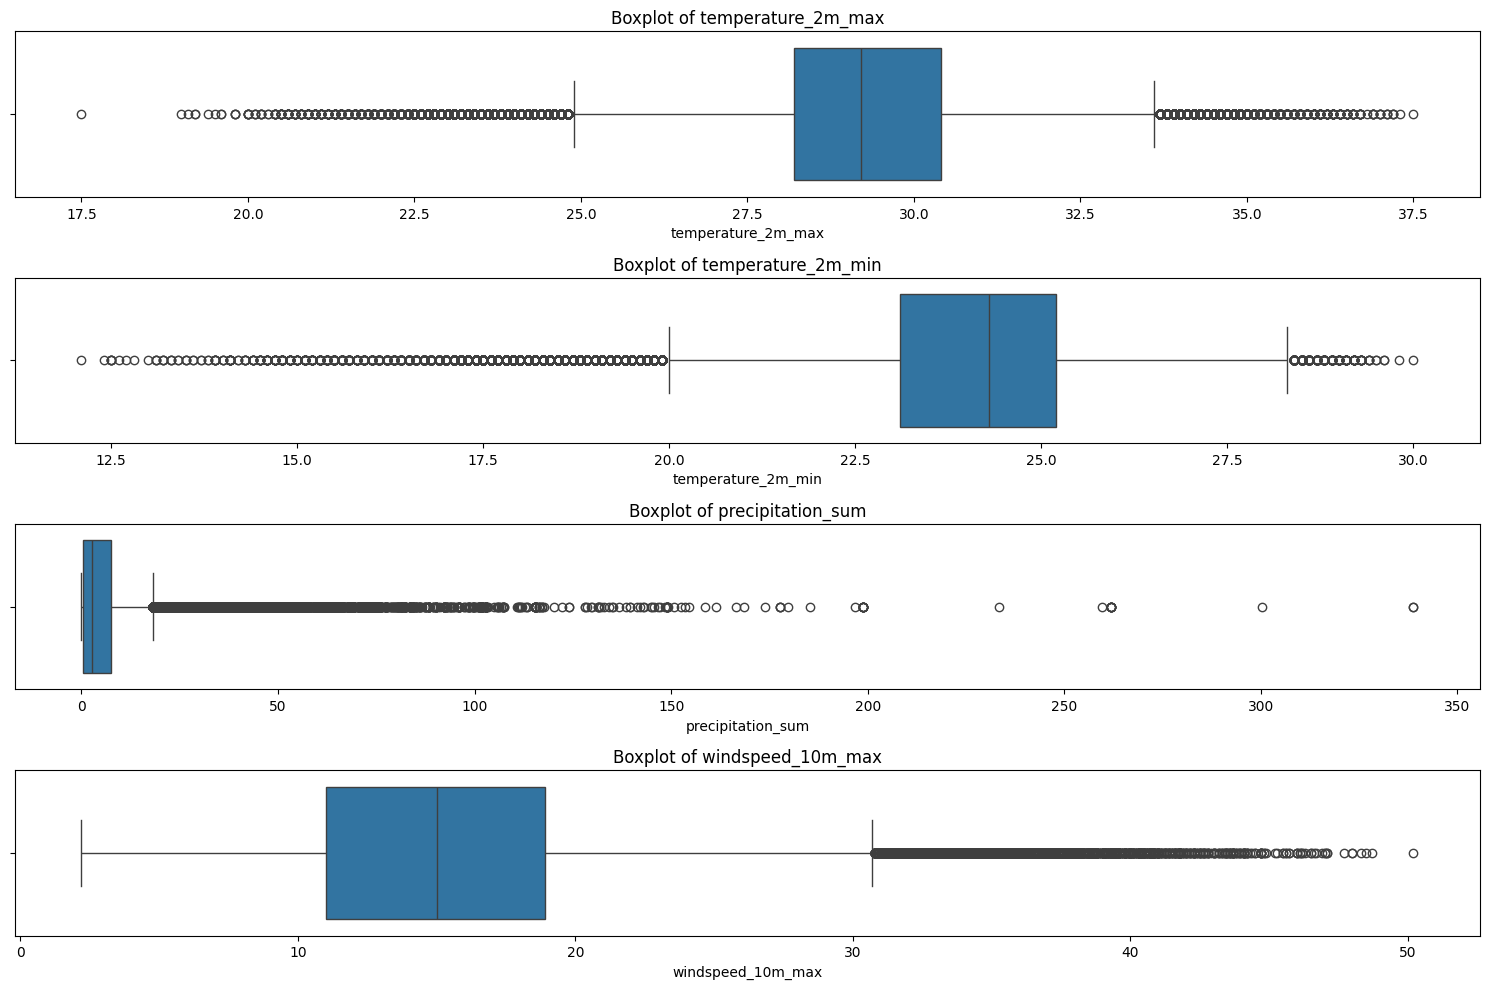

In [ ]:
# Convert sunrise and sunset to datetime if they're not already
if 'sunrise' in df.columns and 'sunset' in df.columns:
    print("\nProcessing sunrise and sunset columns...")
    df['sunrise'] = pd.to_datetime(df['sunrise'])
    df['sunset'] = pd.to_datetime(df['sunset'])

    # Extract useful features from sunrise/sunset
    df['daylight_hours'] = (df['sunset'] - df['sunrise']).dt.total_seconds() / 3600
    print(f"Created new feature: 'daylight_hours' (range: {df['daylight_hours'].min():.2f} to {df['daylight_hours'].max():.2f} hours)")

# Check for outliers in numerical columns
print("\nChecking for outliers in numerical columns:")
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for key numerical features
key_features = ['temperature_2m_max', 'temperature_2m_min', 'precipitation_sum', 'windspeed_10m_max']
key_features = [col for col in key_features if col in numerical_cols]

plt.figure(figsize=(15, 10))
for i, col in enumerate(key_features, 1):
    plt.subplot(len(key_features), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()


Encoding categorical column: 'country'
Unique values in 'country': 1

Encoding categorical column: 'city'
Unique values in 'city': 30

Creating temporal features from datetime index...
Creating cyclical features for seasonality...

Checking for multicollinearity between features:


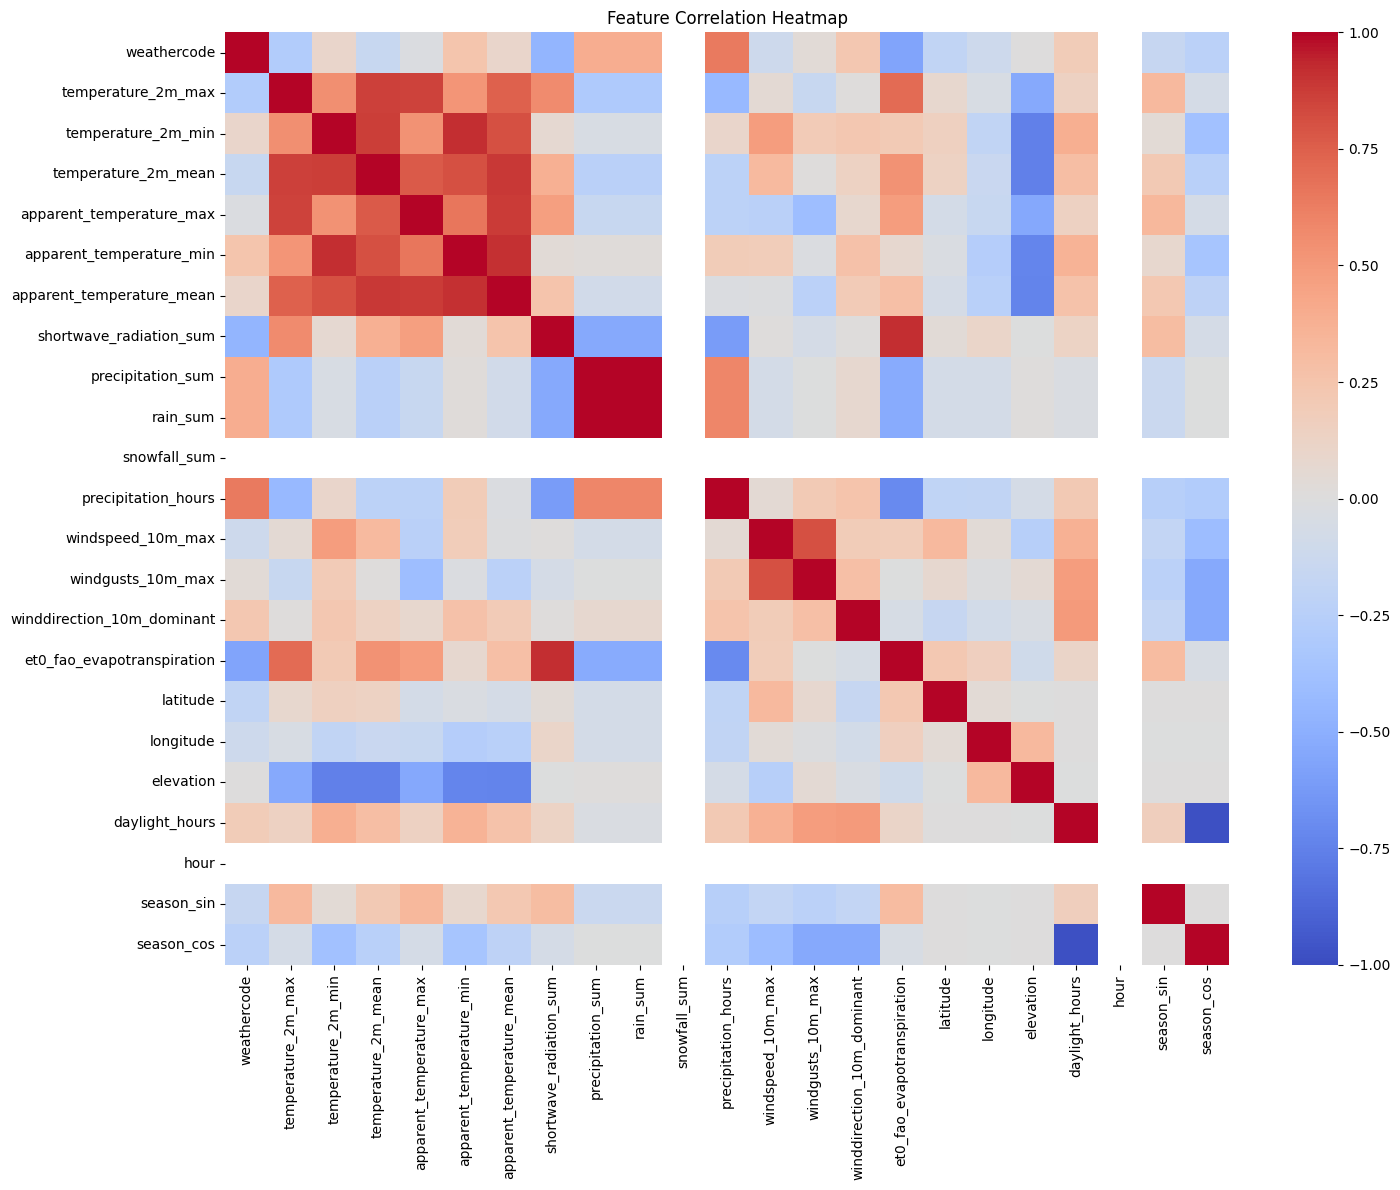


Highly correlated feature pairs (|correlation| > 0.9):
temperature_2m_min and apparent_temperature_min: 0.9177
apparent_temperature_min and apparent_temperature_mean: 0.9109
shortwave_radiation_sum and et0_fao_evapotranspiration: 0.9144
precipitation_sum and rain_sum: 1.0000
daylight_hours and season_cos: -0.9786
Consider removing one feature from each highly correlated pair.

Final preprocessed data statistics:
Shape: (147480, 23)
Number of features: 23
Time range: 2010-01-01 00:00:00 to 2023-06-17 00:00:00
Sampling frequency: 1 days 00:00:00

First few rows of preprocessed data:


,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,rain_sum,...,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,daylight_hours,hour,season_sin,season_cos
time,,,,,,,,,,,,,,,,,,,,,
2010-01-01,2,30.0,22.7,26.1,34.4,25.2,29.2,20.92,0.0,0.0,...,27.4,20,4.58,7.0,79.899994,16,11.716667,0,0.017213,0.999852
2010-01-02,51,29.9,23.5,26.2,33.8,26.2,29.8,17.71,0.1,0.1,...,27.0,24,3.84,7.0,79.899994,16,11.733333,0,0.034422,0.999407
2010-01-03,51,29.5,23.2,26.0,34.3,26.3,29.9,17.76,0.6,0.6,...,27.4,16,3.65,7.0,79.899994,16,11.716667,0,0.051620,0.998667
2010-01-04,2,28.9,21.9,25.3,31.6,23.4,27.8,16.50,0.0,0.0,...,34.6,356,3.79,7.0,79.899994,16,11.733333,0,0.068802,0.997630
2010-01-05,1,28.1,21.3,24.5,30.1,23.1,26.1,23.61,0.0,0.0,...,37.1,355,4.97,7.0,79.899994,16,11.733333,0,0.085965,0.996298


In [ ]:
# Handle categorical features
categorical_cols = ['country', 'city']
for col in categorical_cols:
    if col in df.columns:
        print(f"\nEncoding categorical column: '{col}'")
        print(f"Unique values in '{col}': {df[col].nunique()}")
        df = pd.get_dummies(df, columns=[col], drop_first=True)

# Deal with missing values
# For numerical columns, fill with mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
before_fillna = df[numerical_cols].isnull().sum().sum()

if before_fillna > 0:
    print(f"\nFilling {before_fillna} missing numerical values with column means...")
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
    after_fillna = df[numerical_cols].isnull().sum().sum()
    print(f"Remaining missing values after imputation: {after_fillna}")

# Create additional temporal features
print("\nCreating temporal features from datetime index...")
df['month'] = df.index.month
df['day'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['hour'] = df.index.hour if df.index.hour.nunique() > 1 else 0

# Create seasonal features using sine and cosine transformations
print("Creating cyclical features for seasonality...")
df['season_sin'] = np.sin(2 * np.pi * df.index.dayofyear/365)
df['season_cos'] = np.cos(2 * np.pi * df.index.dayofyear/365)

# Check for multicollinearity with a correlation heatmap
print("\nChecking for multicollinearity between features:")
plt.figure(figsize=(15, 12))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Identify highly correlated features (|correlation| > 0.9)
high_corr_features = []
for i, col1 in enumerate(correlation_matrix.columns):
    for col2 in correlation_matrix.columns[i+1:]:
        if abs(correlation_matrix.loc[col1, col2]) > 0.9:
            high_corr_features.append((col1, col2, correlation_matrix.loc[col1, col2]))

if high_corr_features:
    print("\nHighly correlated feature pairs (|correlation| > 0.9):")
    for col1, col2, corr in high_corr_features:
        print(f"{col1} and {col2}: {corr:.4f}")
    print("Consider removing one feature from each highly correlated pair.")

# Select only numerical features for modeling
df_model = df.select_dtypes(include=['float64', 'int64'])

# Final dataset statistics
print("\nFinal preprocessed data statistics:")
print(f"Shape: {df_model.shape}")
print(f"Number of features: {df_model.shape[1]}")
print(f"Time range: {df.index.min()} to {df.index.max()}")
print(f"Sampling frequency: {df.index.to_series().diff().value_counts().index[0]}")

# Display head of preprocessed data
print("\nFirst few rows of preprocessed data:")
df_model.head()

##4: Feature Selection and Data Visualization

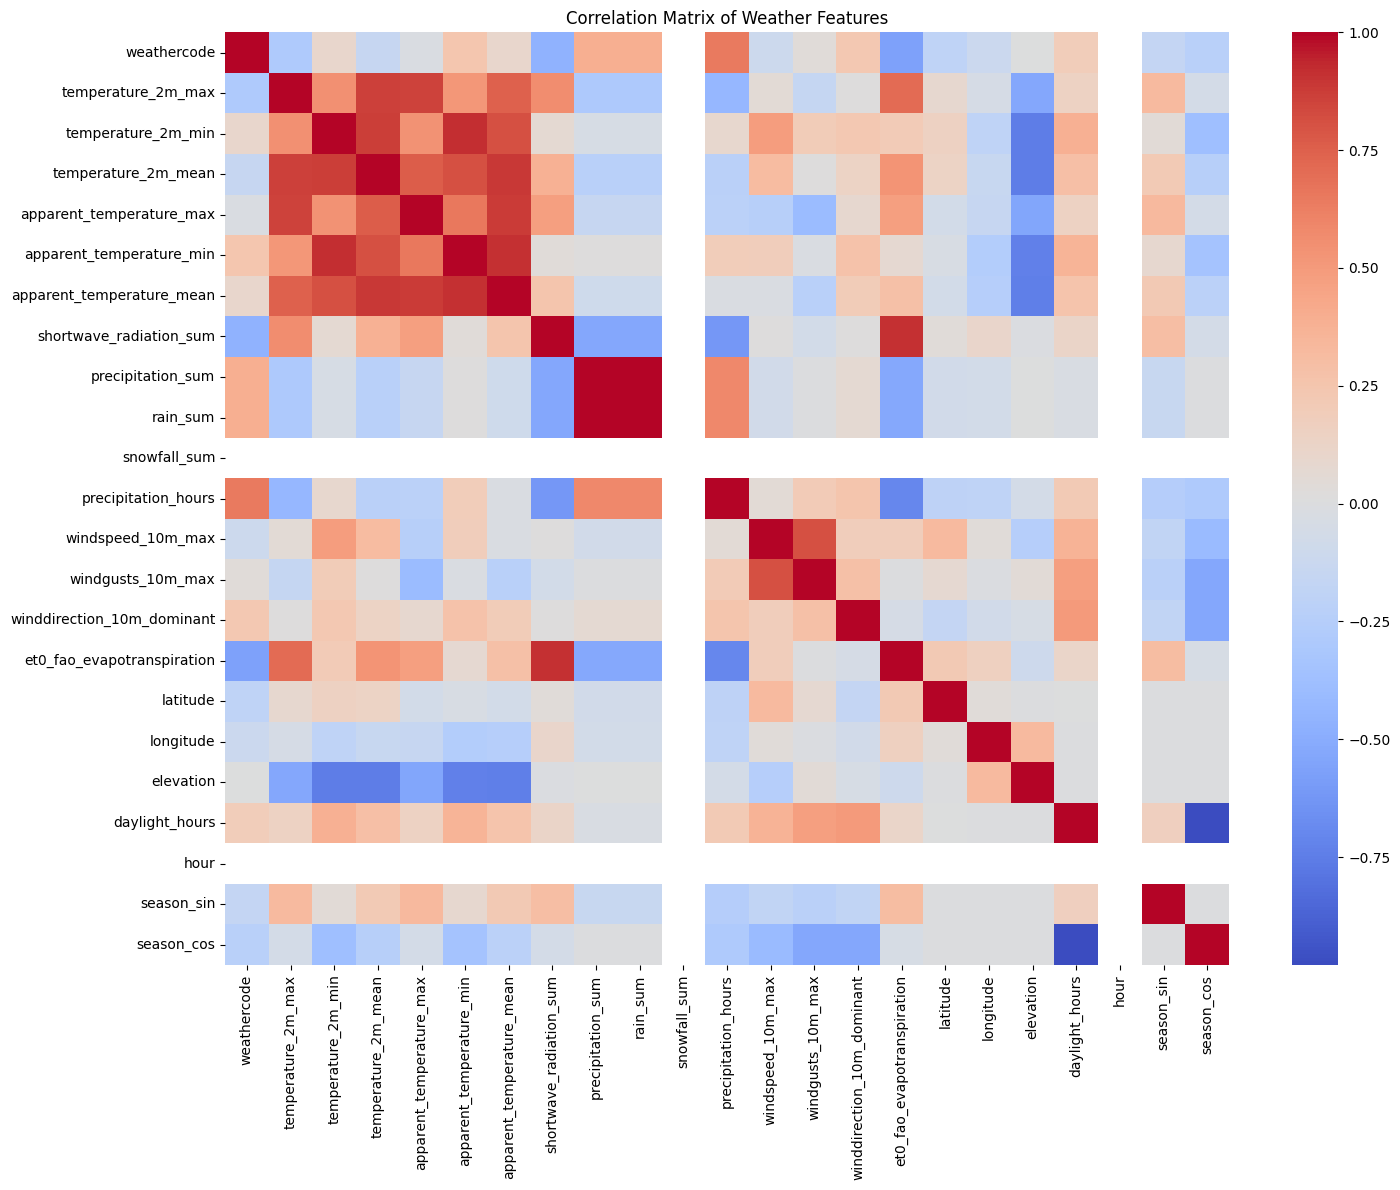

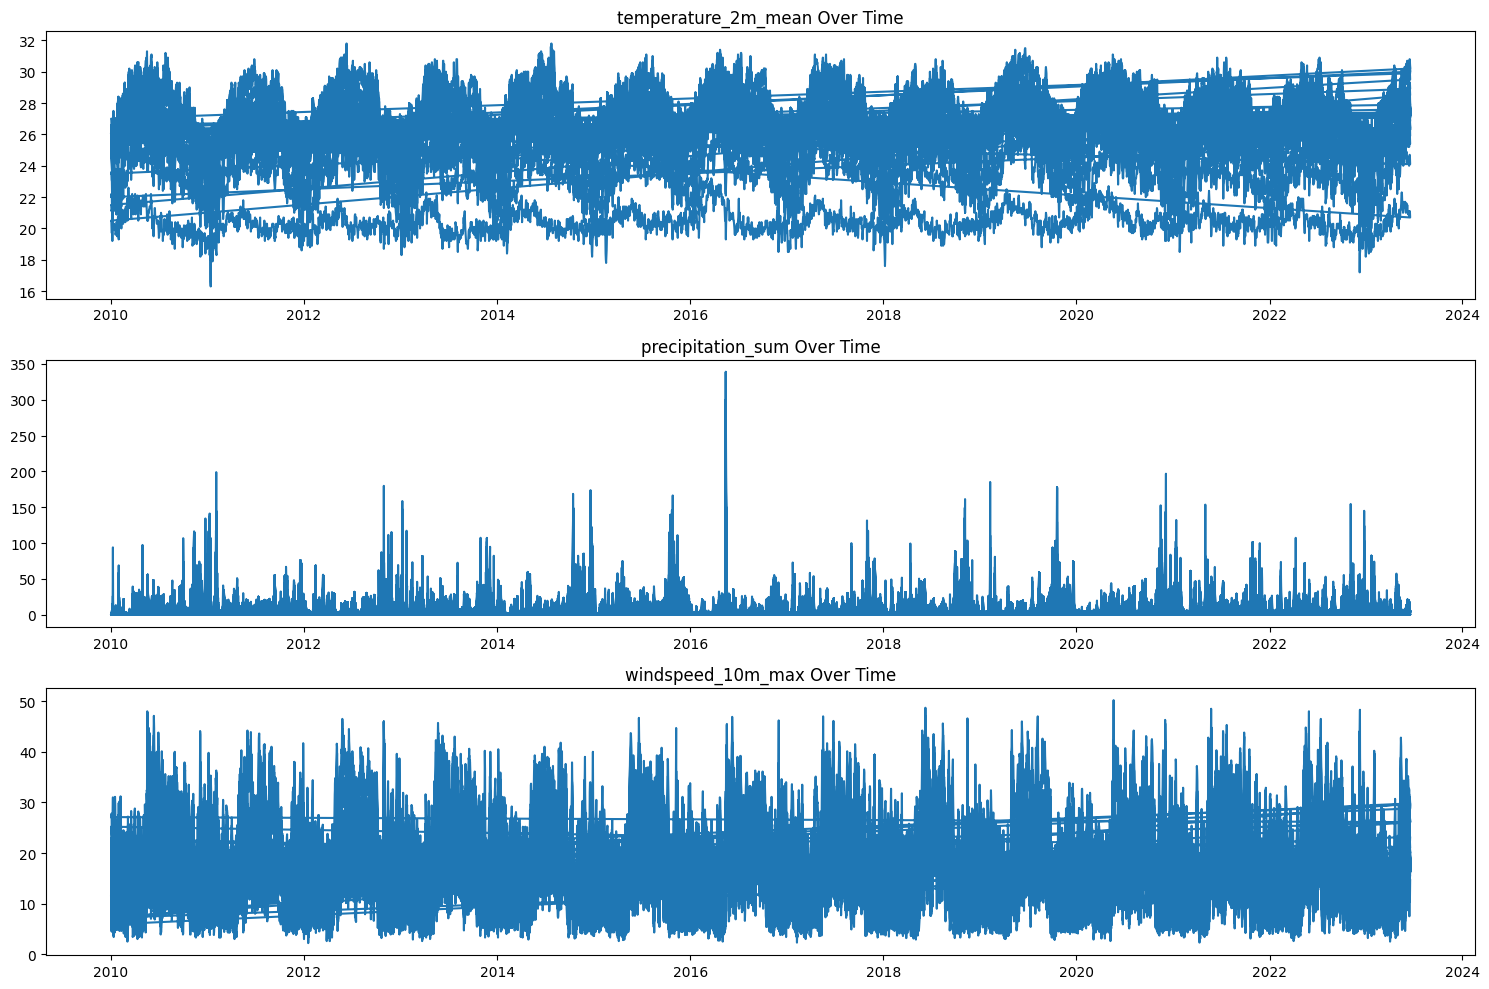

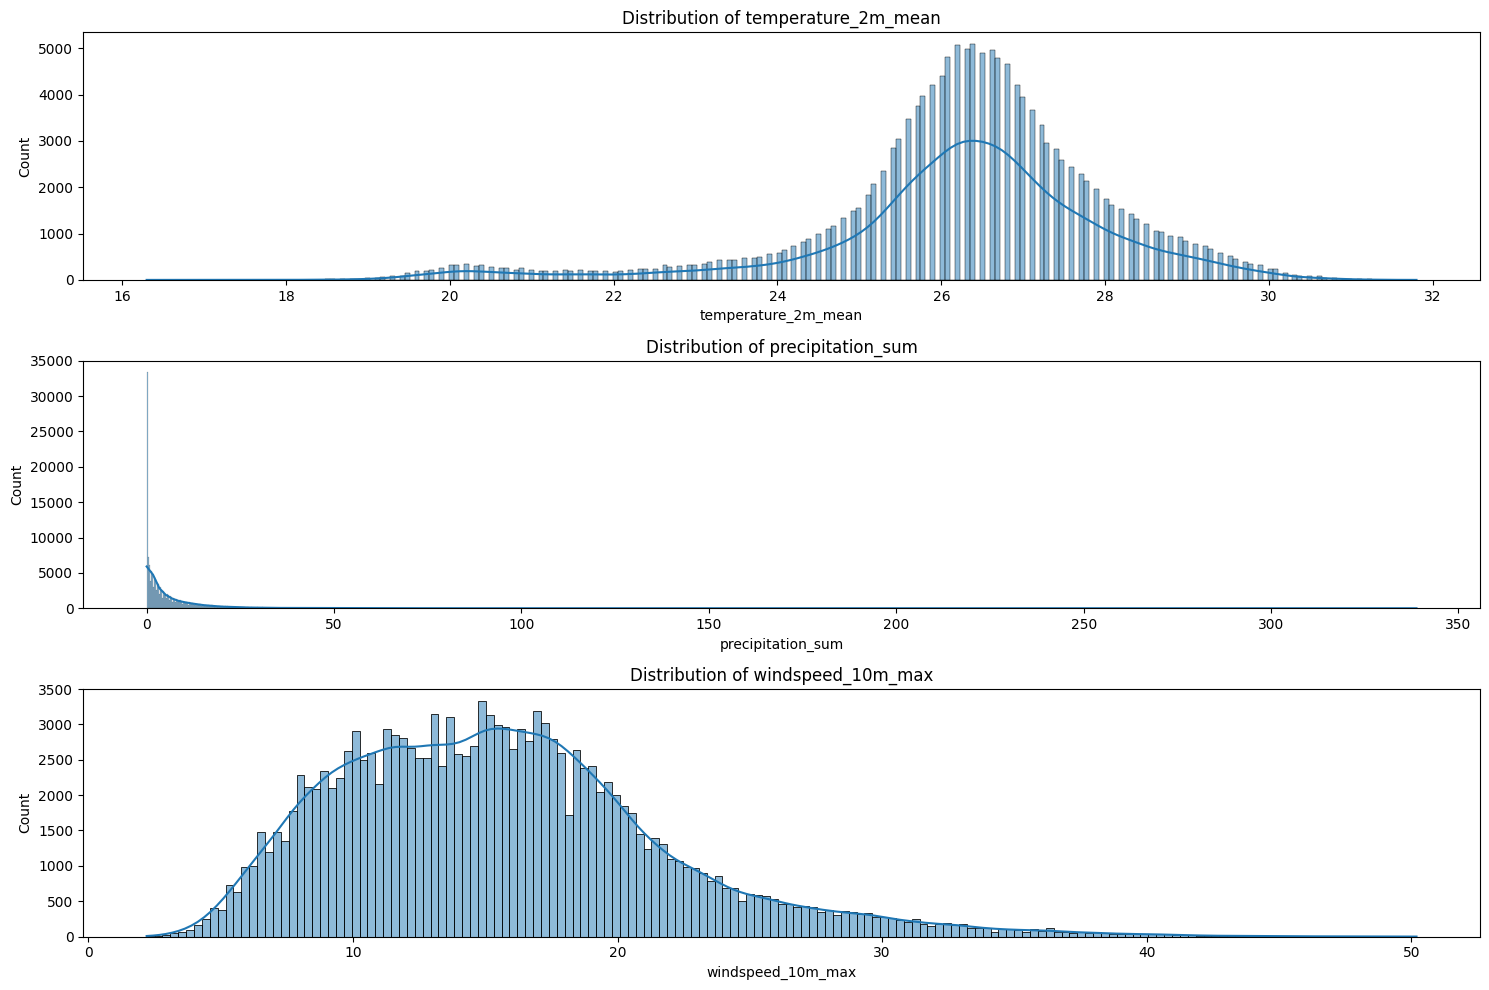

In [ ]:
# Correlation analysis
plt.figure(figsize=(15, 12))
correlation_matrix = df_model.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Weather Features')
plt.tight_layout()
plt.show()

# Time Series Plot of Key Features
target_features = ['temperature_2m_mean', 'precipitation_sum', 'windspeed_10m_max']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(target_features, 1):
    plt.subplot(len(target_features), 1, i)
    plt.plot(df_model.index, df_model[feature])
    plt.title(f'{feature} Over Time')
    plt.tight_layout()

plt.show()

# Distribution of key weather metrics
plt.figure(figsize=(15, 10))
for i, feature in enumerate(target_features, 1):
    plt.subplot(len(target_features), 1, i)
    sns.histplot(df_model[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()

##5: Feature Engineering and Preparation for LSTM

In [ ]:
# Define the target variable(s) you want to predict
# For this example, we'll predict temperature_2m_mean
target_column = 'temperature_2m_mean'

# Define the features (predictors)
feature_columns = [col for col in df_model.columns if col != target_column]

# Normalize the data
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X = scaler_X.fit_transform(df_model[feature_columns])
y = scaler_y.fit_transform(df_model[[target_column]])







In [ ]:
# Create sequences for LSTM
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Define the number of time steps (lookback period)
time_steps = 14  # Two-week lookback period, adjust based on your data frequency

# Create sequences
X_seq, y_seq = create_sequences(X, y, time_steps)

print(f"Sequence data shape: X_seq: {X_seq.shape}, y_seq: {y_seq.shape}")

Sequence data shape: X_seq: (147466, 14, 22), y_seq: (147466, 1)


In [ ]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_seq, y_seq, test_size=0.3, random_state=42, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=False)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (103226, 14, 22), (103226, 1)
Validation set: (22120, 14, 22), (22120, 1)
Test set: (22120, 14, 22), (22120, 1)


##6: Building the LSTM Model

In [ ]:
# Build the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()

    # First LSTM layer with return sequences for stacking
    model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))

    # Second LSTM layer
    model.add(LSTM(32, activation='relu')) # add ReLu activation function for second layer
    model.add(Dropout(0.2))

    # Output layer
    model.add(Dense(1))

    # Compile the model with a slightly higher learning rate to converge faster
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )

    return model

# Get input shape from training data
input_shape = (X_train.shape[1], X_train.shape[2])

# Build the model
model = build_lstm_model(input_shape)

# Display model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 14, 64)         │        22,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,721 (135.63 KB)

 Trainable params: 34,721 (135.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set up callbacks for early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_lstm_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

Epoch 1/20
3224/3226 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0098 - mae: 0.0700

3226/3226 ━━━━━━━━━━━━━━━━━━━━ 72s 20ms/step - loss: 0.0098 - mae: 0.0699 - val_loss: 0.0015 - val_mae: 0.0304
Epoch 2/20
3225/3226 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0017 - mae: 0.0318

3226/3226 ━━━━━━━━━━━━━━━━━━━━ 84s 21ms/step - loss: 0.0017 - mae: 0.0318 - val_loss: 0.0012 - val_mae: 0.0269
Epoch 3/20
3226/3226 ━━━━━━━━━━━━━━━━━━━━ 80s 21ms/step - loss: 0.0013 - mae: 0.0284 - val_loss: 0.0012 - val_mae: 0.0278
Epoch 4/20
3226/3226 ━━━━━━━━━━━━━━━━━━━━ 89s 23ms/step - loss: 0.0012 - mae: 0.0273 - val_loss: 0.0012 - val_mae: 0.0270
Epoch 5/20
3225/3226 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0012 - mae: 0.0267

3226/3226 ━━━━━━━━━━━━━━━━━━━━ 78s 21ms/step - loss: 0.0012 - mae: 0.0267 - val_loss: 0.0011 - val_mae: 0.0260
Epoch 6/20
3226/3226 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0012 - mae: 0.0264

3226/3226 ━━━━━━━━━━━━━━━━━━━━ 70s 22ms/step - loss: 0.0012 - mae: 0.0264 - val_loss: 0.0011 - val_mae: 0.0252
Epoch 7/20
3225/3226 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0012 - mae: 0.0264

3226/3226 ━━━━━━━━━━━━━━━━━━━━ 79s 21ms/step - loss: 0.0012 - mae: 0.0264 - val_loss: 0.0010 - val_mae: 0.0249
Epoch 8/20
3226/3226 ━━━━━━━━━━━━━━━━━━━━ 83s 21ms/step - loss: 0.0011 - mae: 0.0260 - val_loss: 0.0011 - val_mae: 0.0253
Epoch 9/20
3226/3226 ━━━━━━━━━━━━━━━━━━━━ 80s 20ms/step - loss: 0.0011 - mae: 0.0259 - val_loss: 0.0011 - val_mae: 0.0251
Epoch 10/20
3226/3226 ━━━━━━━━━━━━━━━━━━━━ 82s 20ms/step - loss: 0.0011 - mae: 0.0258 - val_loss: 0.0011 - val_mae: 0.0258
Epoch 11/20
3225/3226 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0011 - mae: 0.0256

3226/3226 ━━━━━━━━━━━━━━━━━━━━ 83s 21ms/step - loss: 0.0011 - mae: 0.0256 - val_loss: 0.0010 - val_mae: 0.0249
Epoch 12/20
3226/3226 ━━━━━━━━━━━━━━━━━━━━ 79s 20ms/step - loss: 0.0011 - mae: 0.0256 - val_loss: 0.0010 - val_mae: 0.0252
Epoch 13/20
3226/3226 ━━━━━━━━━━━━━━━━━━━━ 83s 20ms/step - loss: 0.0011 - mae: 0.0256 - val_loss: 0.0010 - val_mae: 0.0252
Epoch 14/20
3226/3226 ━━━━━━━━━━━━━━━━━━━━ 84s 21ms/step - loss: 0.0011 - mae: 0.0254 - val_loss: 0.0010 - val_mae: 0.0252
Epoch 15/20
3226/3226 ━━━━━━━━━━━━━━━━━━━━ 82s 21ms/step - loss: 0.0011 - mae: 0.0253 - val_loss: 0.0010 - val_mae: 0.0248
Epoch 16/20
3223/3226 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0011 - mae: 0.0253

3226/3226 ━━━━━━━━━━━━━━━━━━━━ 86s 22ms/step - loss: 0.0011 - mae: 0.0253 - val_loss: 9.9801e-04 - val_mae: 0.0243
Epoch 17/20
3226/3226 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0011 - mae: 0.0251

3226/3226 ━━━━━━━━━━━━━━━━━━━━ 67s 21ms/step - loss: 0.0011 - mae: 0.0251 - val_loss: 9.9616e-04 - val_mae: 0.0243
Epoch 18/20
3226/3226 ━━━━━━━━━━━━━━━━━━━━ 80s 20ms/step - loss: 0.0010 - mae: 0.0251 - val_loss: 0.0010 - val_mae: 0.0245
Epoch 19/20
3226/3226 ━━━━━━━━━━━━━━━━━━━━ 82s 20ms/step - loss: 0.0010 - mae: 0.0248 - val_loss: 0.0010 - val_mae: 0.0250
Epoch 20/20
3226/3226 ━━━━━━━━━━━━━━━━━━━━ 82s 20ms/step - loss: 0.0010 - mae: 0.0249 - val_loss: 0.0010 - val_mae: 0.0247


##7: Model Evaluation


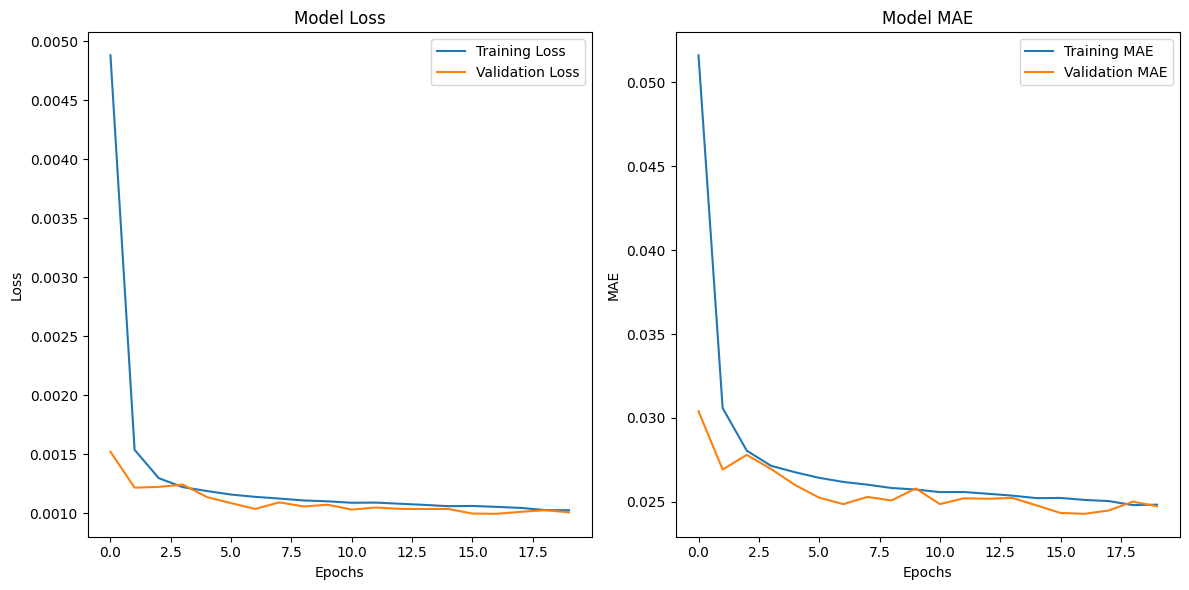

In [ ]:
# Visualize training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Make predictions
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

# Inverse transform to get original scale
train_predictions = scaler_y.inverse_transform(train_predictions)
val_predictions = scaler_y.inverse_transform(val_predictions)
test_predictions = scaler_y.inverse_transform(test_predictions)

y_train_orig = scaler_y.inverse_transform(y_train)
y_val_orig = scaler_y.inverse_transform(y_val)
y_test_orig = scaler_y.inverse_transform(y_test)

3226/3226 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step
692/692 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
692/692 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


In [ ]:
# Calculate performance metrics
def calculate_metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    return mse, rmse, mae, r2

train_mse, train_rmse, train_mae, train_r2 = calculate_metrics(y_train_orig, train_predictions)
val_mse, val_rmse, val_mae, val_r2 = calculate_metrics(y_val_orig, val_predictions)
test_mse, test_rmse, test_mae, test_r2 = calculate_metrics(y_test_orig, test_predictions)

print("Training Set Metrics:")
print(f"MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")

print("\nValidation Set Metrics:")
print(f"MSE: {val_mse:.4f}, RMSE: {val_rmse:.4f}, MAE: {val_mae:.4f}, R²: {val_r2:.4f}")

print("\nTest Set Metrics:")
print(f"MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")

Training Set Metrics:
MSE: 0.1985, RMSE: 0.4455, MAE: 0.3467, R²: 0.9171

Validation Set Metrics:
MSE: 0.2393, RMSE: 0.4892, MAE: 0.3764, R²: 0.8941

Test Set Metrics:
MSE: 0.2480, RMSE: 0.4980, MAE: 0.3883, R²: 0.9689


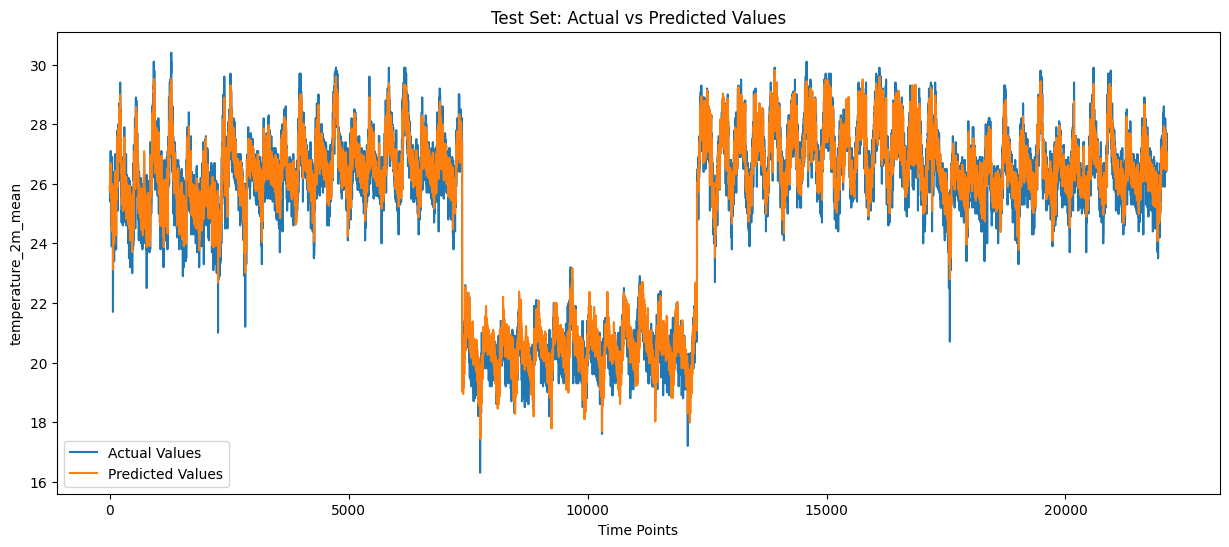

In [ ]:
# Visualize predictions vs actual values
plt.figure(figsize=(15, 6))
plt.plot(y_test_orig, label='Actual Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Set: Actual vs Predicted Values')
plt.xlabel('Time Points')
plt.ylabel(target_column)
plt.legend()
plt.show()